In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore');

# Step 1: Reading and Understanding Data

In [2]:
bikes = pd.read_csv('./data/day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikes.shape

(730, 16)

In [5]:
# Statistical description of Data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Analysing Categorical and Continuous Data

1. Categorical Columns
    - season
    - yr (0-2018, 1-2019)
    - mnth
    - weekday (0-6, Sunday-Saturday)
    - weathersit

2. Continuous Columns
    - instant
    - temp
    - atemp
    - hum
    - windspeed
    - casual
    - registered

# Step 2. Data Cleaning and Preparation

- Drop unnecessary variables
- Remove high percentage of Null data rows
- Impute null data


In [6]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Drop unnecessary columns
1. instant : Just an indexing column and can be dropped
2. dteday : As we are not doing a time analysis, so not needed
3. casual & registered : redundant data as only `cnt` is required

In [7]:
trash = ['instant', 'dteday', 'casual', 'registered']
bikes.drop(trash, axis = 1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Handle Null data

In [8]:
bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Handling of Null data is not required as there is none

## Data Standardization
1. Check for the data types: All the categorical columns should be of Object type

In [9]:
bikes.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

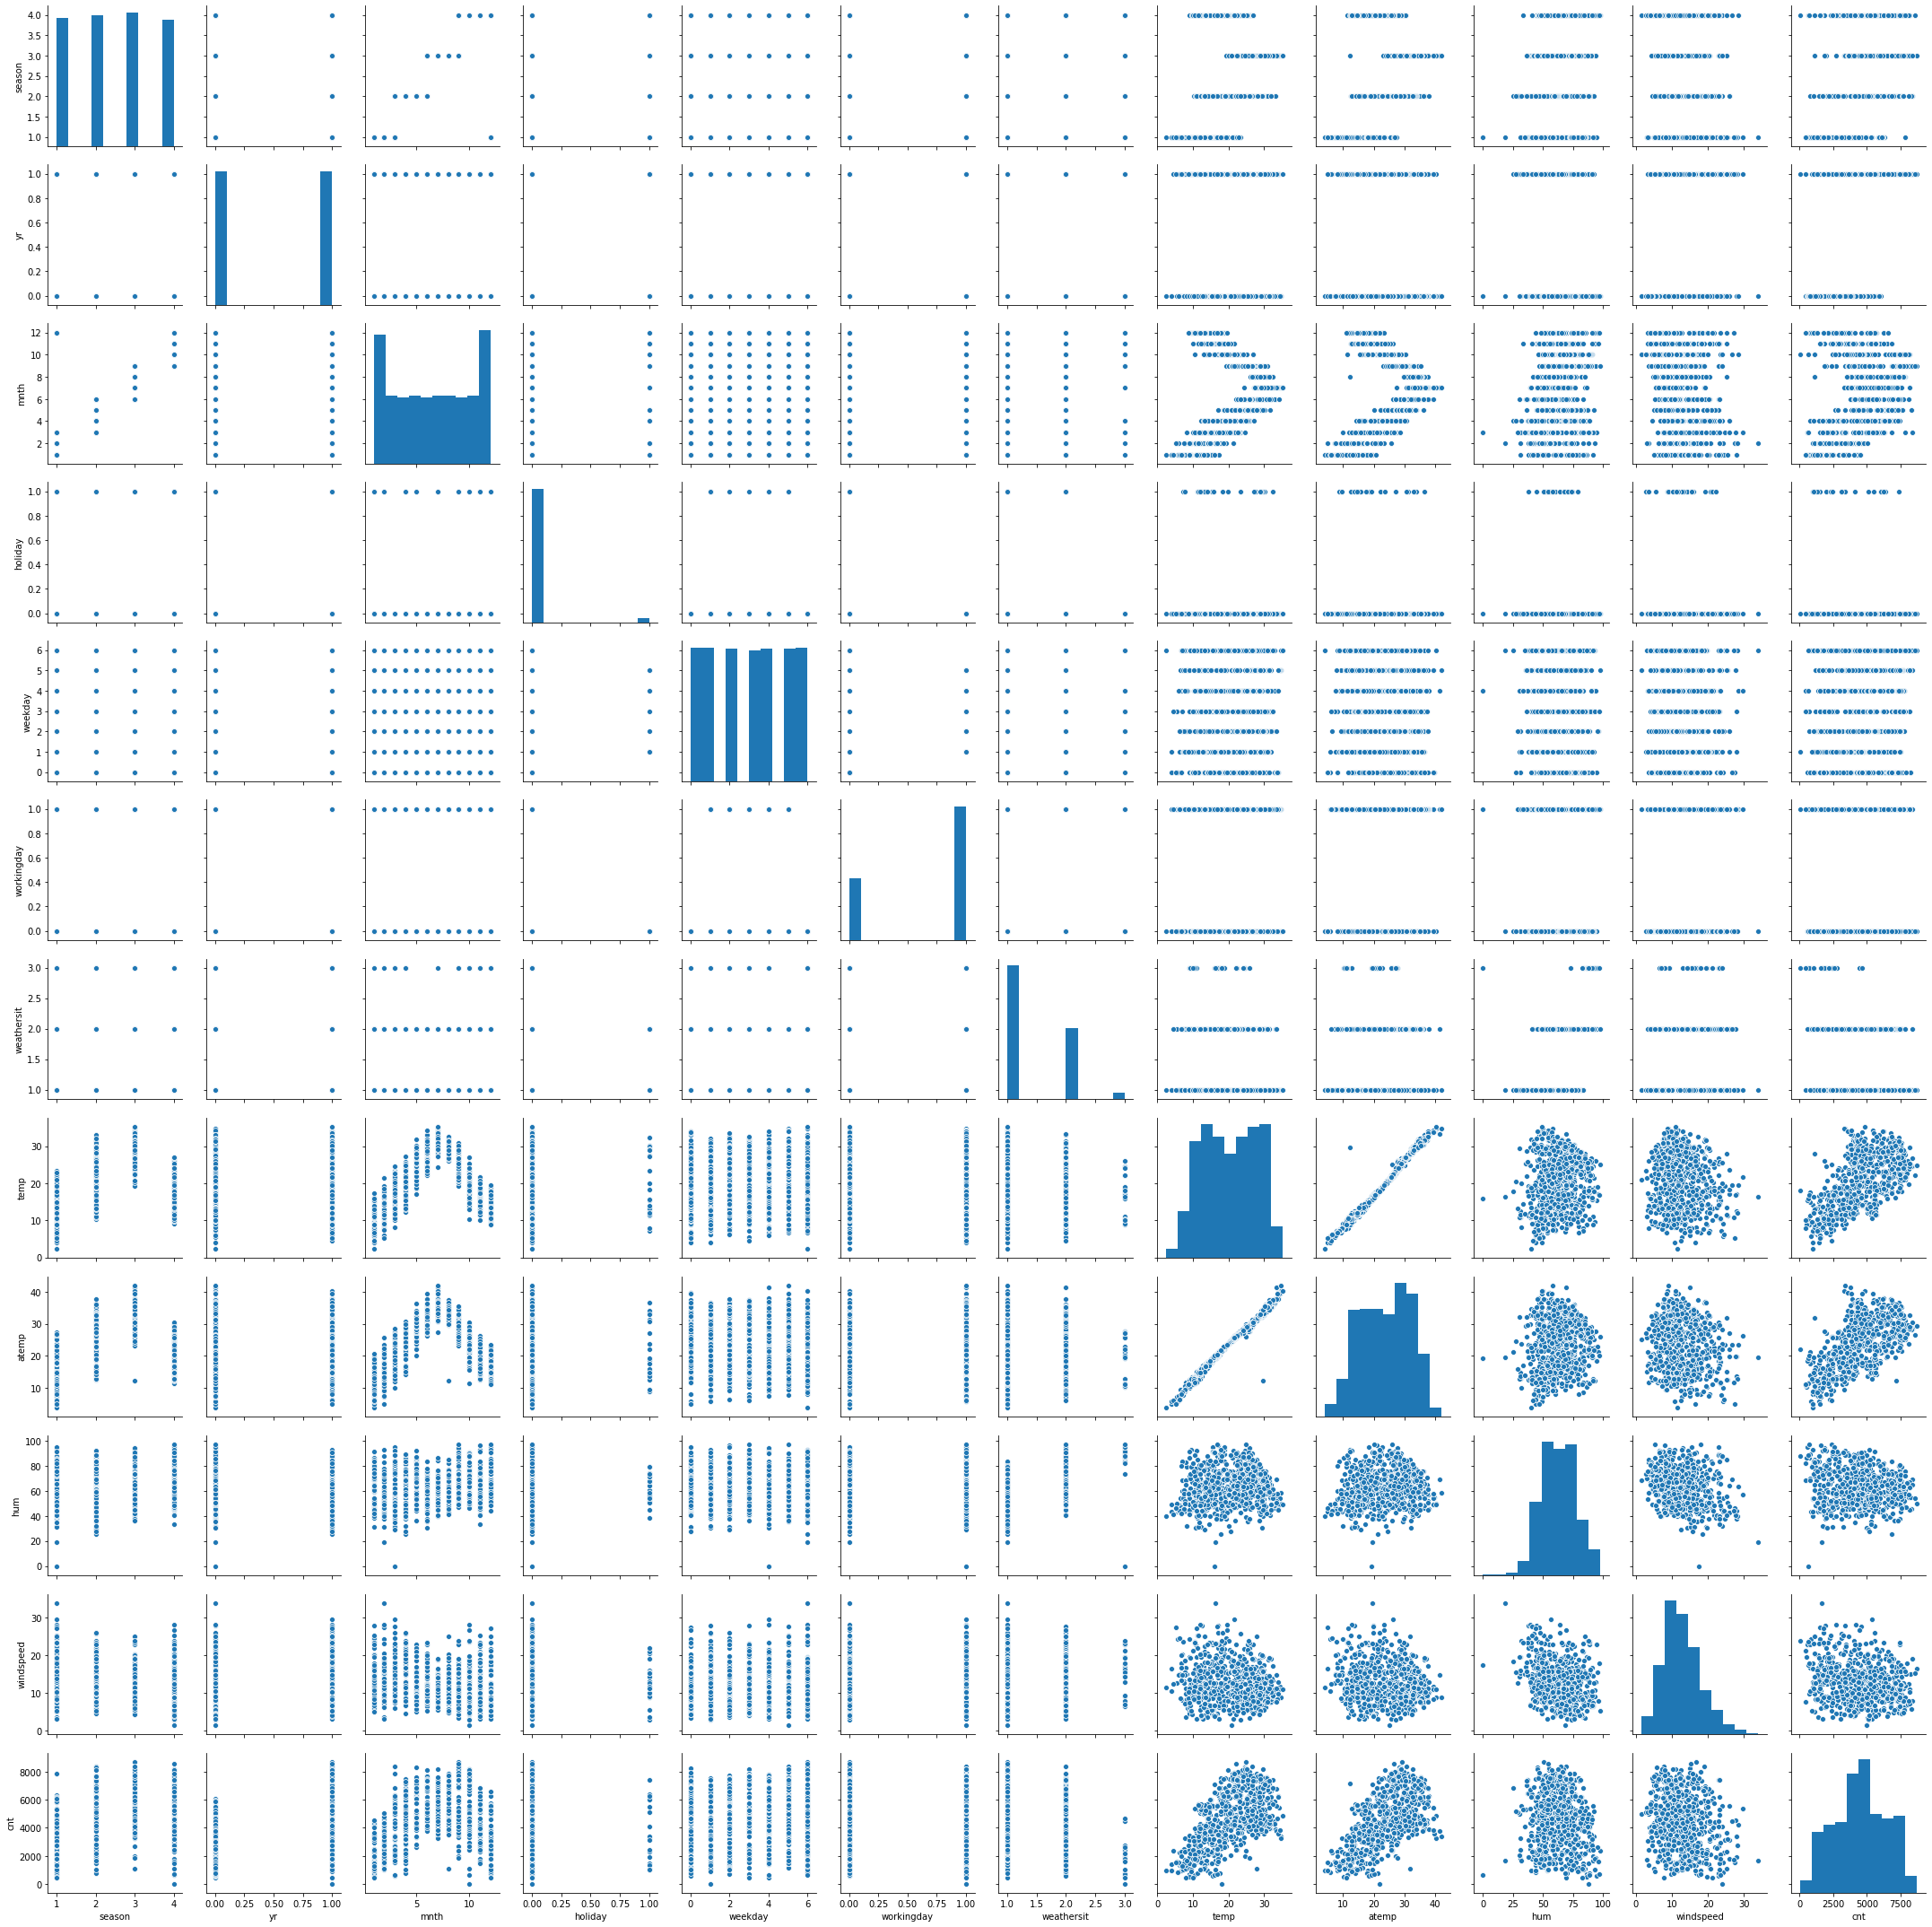

In [10]:
sns.pairplot(bikes)
plt.show()

## Visualizing the Categorical Variables

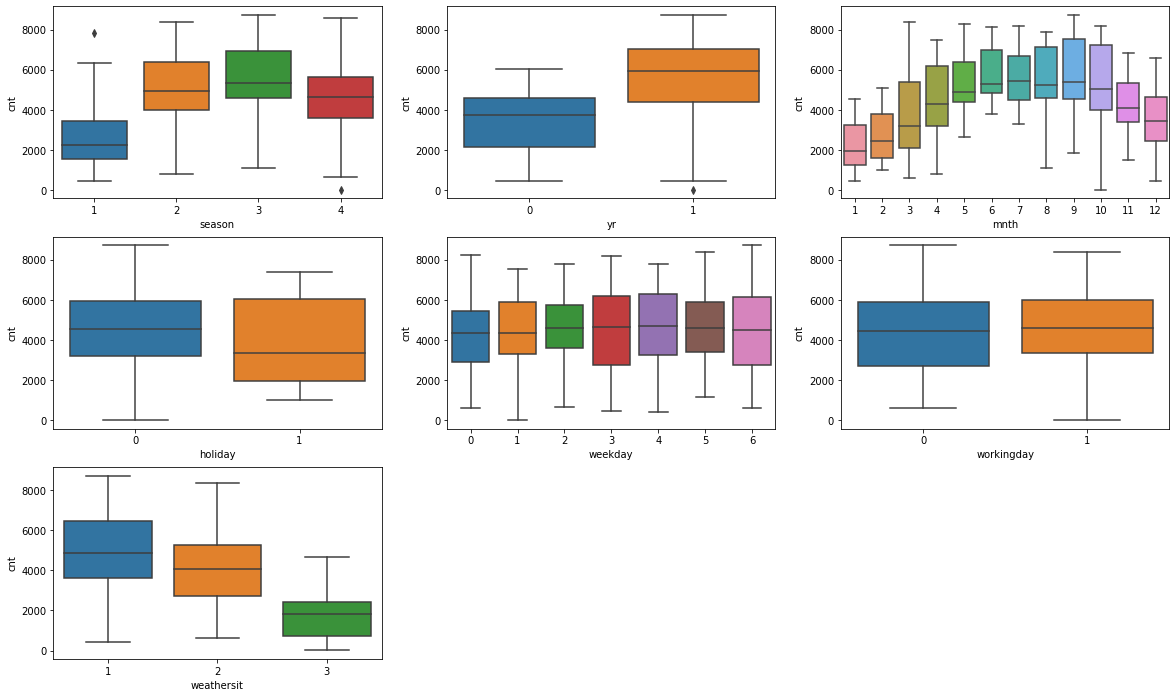

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikes);
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bikes);
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bikes);
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bikes);
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bikes);
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bikes);
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bikes);

## Visualizing the Numeric Variables against cnt

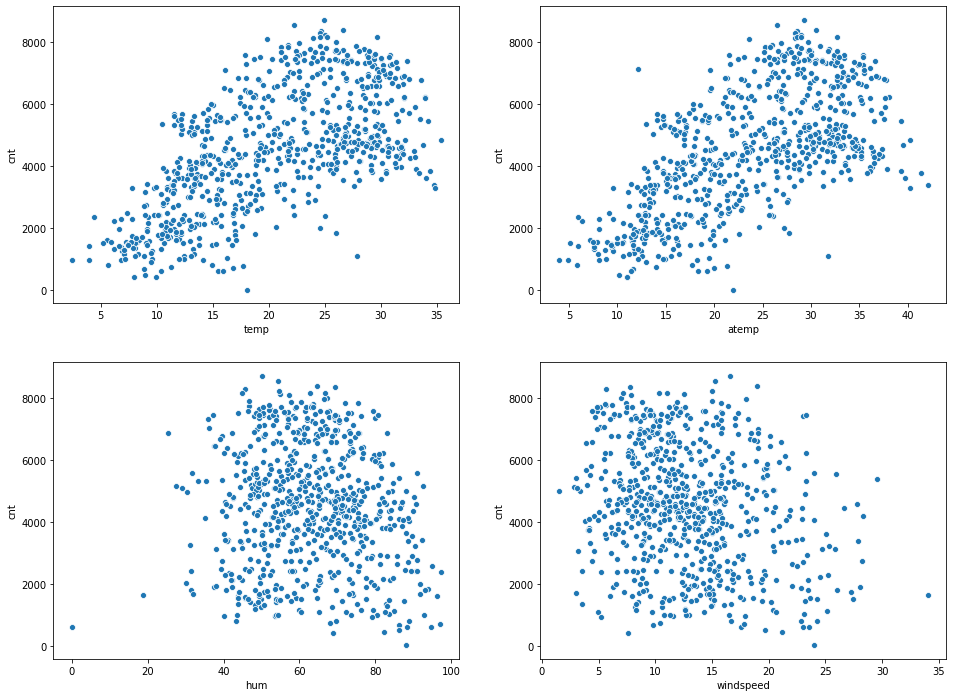

In [12]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1) 
# temp, atemp, hum
sns.scatterplot(x="temp", y="cnt", data=bikes)
plt.subplot(2,2,2)
sns.scatterplot(x="atemp", y="cnt", data=bikes)
plt.subplot(2,2,3)
sns.scatterplot(x="hum", y="cnt", data=bikes)
plt.subplot(2,2,4)
sns.scatterplot(x="windspeed", y="cnt", data=bikes)


In [13]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Let's also visualise a correlation among all numeric variables

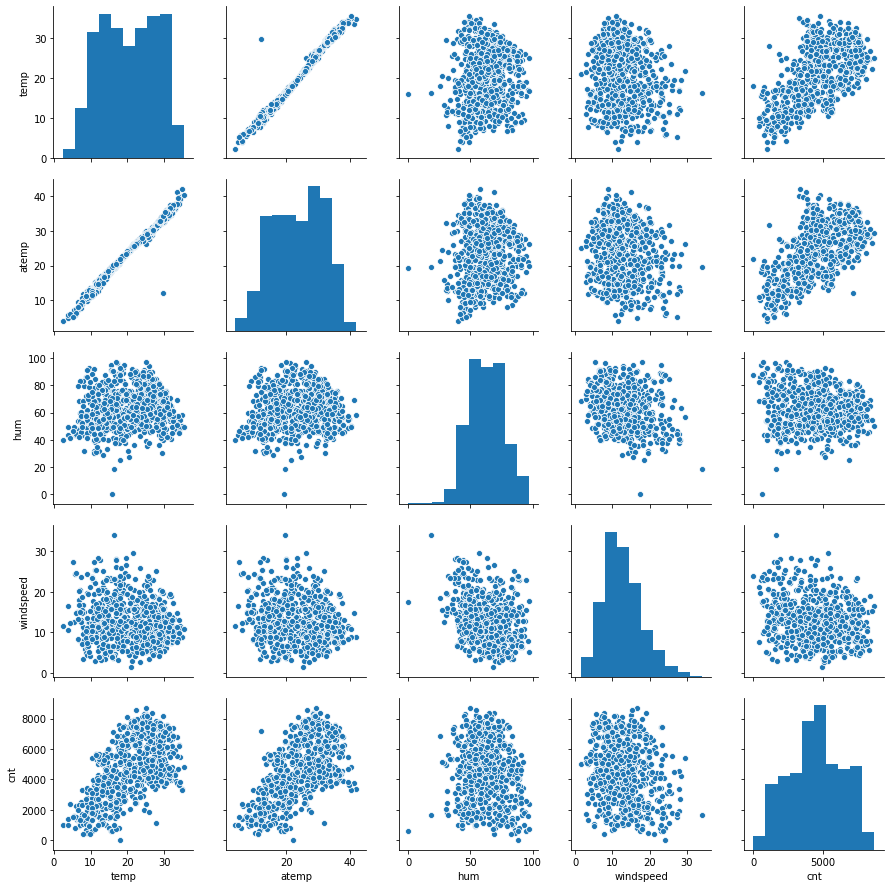

In [92]:
numvars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bikes[numvars])
plt.show()

### The above plots are the proof that `temp` and `atemp` have similar relations with `cnt`. So they seems like redundant variables. We can further verify this using a heatmap.

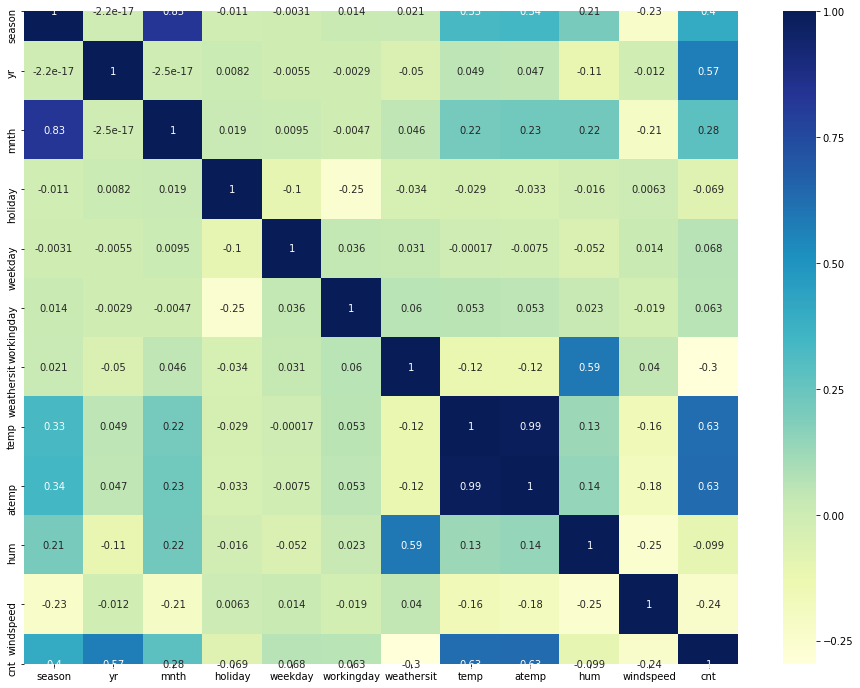

In [15]:
# Check for correlation between variables
plt.figure(figsize = (16, 12))
sns.heatmap(bikes.corr(), annot= True, cmap="YlGnBu")
plt.show()

# Step 3 : Preparing the Data for Modelling
## Convert Categorical variables to Dummy Variables : `season`, `mnth`, `weekday`, `weathersit`

In [16]:
# Creating dummy variables for season

seasons = pd.get_dummies(bikes.season, drop_first=True)
seasons.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [17]:
seasons = seasons.rename(columns = {2:'summer', 3:'fall', 4:'winter'})
seasons.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [18]:
# Concat seasons with bikes and drop season column
bikes = pd.concat([bikes, seasons], axis = 1)
bikes.drop('season', axis = 1, inplace=True)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [19]:
# Creating dummy variables for mnth

months = pd.get_dummies(bikes.mnth, drop_first=True)
months.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Rename columns
months = months.rename(columns={2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8: 'August',
                                9: 'September', 10:'October', 11: 'November', 12: 'December'})
months.head()

,February,March,April,May,June,July,August,September,October,November,December
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Concat months with bikes and drop mnth column
bikes = pd.concat([bikes, months], axis = 1)
bikes.drop('mnth', axis = 1, inplace=True)
bikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,March,April,May,June,July,August,September,October,November,December
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Creating dummy variables for weekday

weekdays = pd.get_dummies(bikes.weekday, drop_first=True)
weekdays.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [23]:
# Rename columns
weekdays = weekdays.rename(columns={1:'Monday', 2: 'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
weekdays.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [24]:
# Concat months with bikes and drop mnth column
bikes = pd.concat([bikes, weekdays], axis = 1)
bikes.drop('weekday', axis = 1, inplace=True)
bikes.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# Creating dummy variables for weathersit

weather = pd.get_dummies(bikes.weathersit, drop_first=True)
weather.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [26]:
# Rename columns
weather = weather.rename(columns={2:'weather_2', 3: 'weather_3'})
weather.head()

,weather_2,weather_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [27]:
# Concat months with bikes and drop mnth column
bikes = pd.concat([bikes, weather], axis = 1)
bikes.drop('weathersit', axis = 1, inplace=True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
summer        730 non-null uint8
fall          730 non-null uint8
winter        730 non-null uint8
February      730 non-null uint8
March         730 non-null uint8
April         730 non-null uint8
May           730 non-null uint8
June          730 non-null uint8
July          730 non-null uint8
August        730 non-null uint8
September     730 non-null uint8
October       730 non-null uint8
November      730 non-null uint8
December      730 non-null uint8
Monday        730 non-null uint8
Tuesday       730 non-null uint8
Wednesday     730 non-null uint8
Thursday      730 non-null uint8
Friday        730 non-null ui

## Splitting the Data into Training and Testing Sets

In [29]:
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, random_state = 100)
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(220, 30)


## Rescaling the Numeric Variables
It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.
#### We will not be scaling the target variable, which is `cnt` in our case. 
Here I will be using MinMax scaling to normalise the numeric data between 0 and 1, i.e., on a comparable scale.

In [30]:
# 1. Instantiate a MinMaxScaler Object
scaler = MinMaxScaler()

# 2. Create a list of numeric variables
numvars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bikes_train[numvars].head()

,temp,atemp,hum,windspeed,cnt
576,29.246653,33.1448,70.4167,11.083475,7216
426,16.980847,20.6746,62.1250,10.792293,4066
728,10.489153,11.5850,48.3333,23.500518,1796
482,15.443347,18.8752,48.9583,8.708325,4220
111,13.803347,16.0977,72.9583,14.707907,1683


In [31]:
# 3. Fit and Transform the data
bikes_train[numvars] = scaler.fit_transform(bikes_train[numvars])
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
bikes_train[numvars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3 : Training the Model

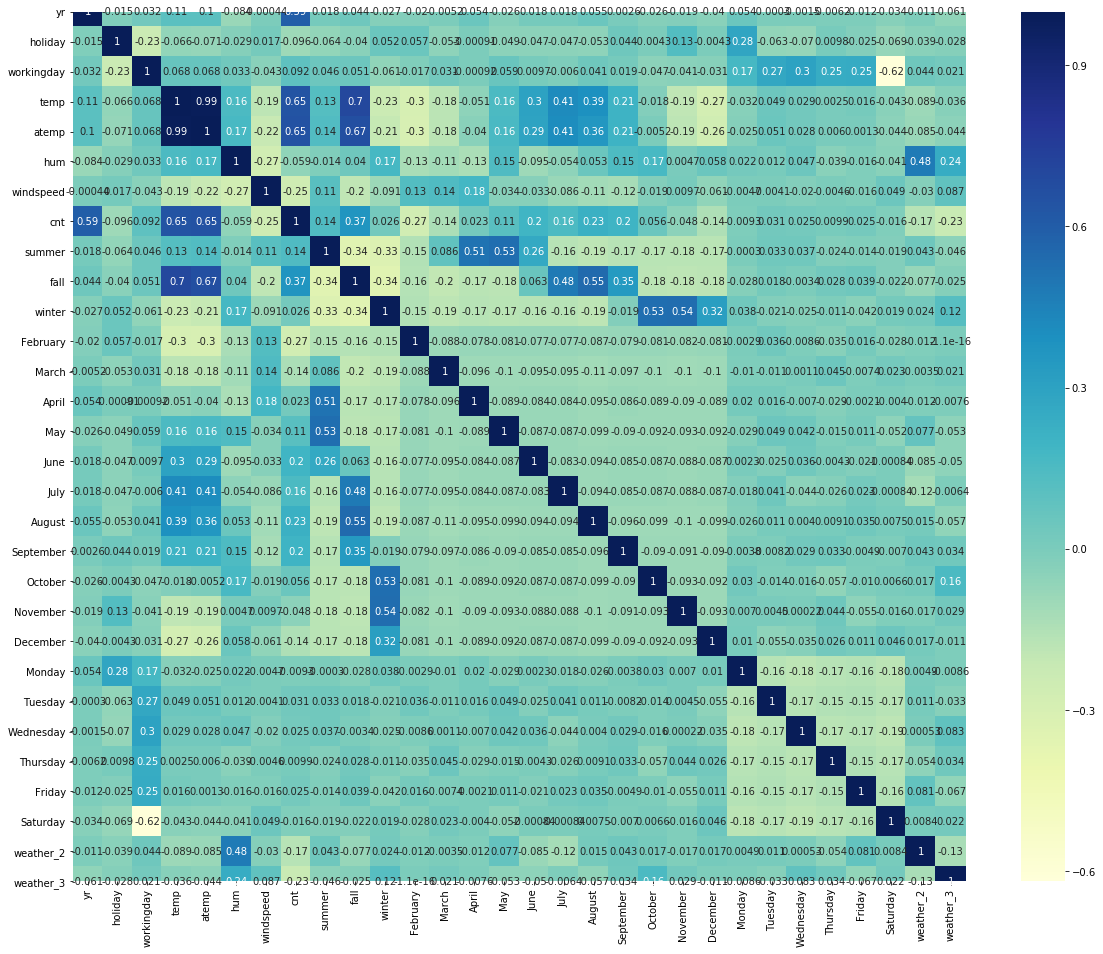

In [33]:
plt.figure(figsize = (20, 16))
sns.heatmap(bikes_train.corr(), annot= True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [34]:
# X_train, y_train
y_train = bikes_train.pop('cnt')
X_train = bikes_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Building the model

I will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE or Recursive feature elimination

In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)

# running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('February', False, 7),
 ('March', False, 2),
 ('April', False, 4),
 ('May', False, 3),
 ('June', False, 5),
 ('July', False, 8),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 9),
 ('December', False, 10),
 ('Monday', False, 11),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Thursday', False, 15),
 ('Friday', False, 13),
 ('Saturday', True, 1),
 ('weather_2', True, 1),
 ('weather_3', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'August', 'September', 'October', 'Saturday',
       'weather_2', 'weather_3'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['atemp', 'February', 'March', 'April', 'May', 'June', 'July',
       'November', 'December', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'],
      dtype='object')

### Building Model from the statsmodels, for the detailed statistics

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [42]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          5.17e-191
Time:                        18:09:24   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1952      0.029      6.790      0.0

#### As the `p value` for `fall` is high, i.e., greater than 0.05, we can drop it

In [43]:
X_train_new = X_train_rfe.drop(['fall'], axis = 1)

#### And now we rebuild the model

In [44]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [45]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [46]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          8.70e-192
Time:                        18:09:24   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.0

#### Now as all the columns have p value less than 0.05, we will check for VIF, Variance Inflation Factor

In [47]:
# Drop const before calculating VIF 
X_train_new = X_train_lm.drop(['const'], axis=1)

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,winter,2.25
12,weather_2,2.14
0,yr,2.03
11,Saturday,1.90
6,summer,1.84
10,October,1.61


#### Remove column with high VIF, `hum`

In [48]:
X_train_new = X.drop('hum', axis=1)

#### And now we rebuild the model

In [49]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [50]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [51]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.97e-188
Time:                        18:09:24   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0937      0.019      4.914      0.0

#### As the `p value` for `October` is greater than 0.05, we can drop it

In [52]:
X_train_new = X_train_lm.drop(['October'], axis = 1)

#### And now we rebuild the model

In [53]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [54]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [55]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          8.64e-189
Time:                        18:09:24   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0903      0.019      4.740      0.0

#### Now we will check for VIF again, Variance Inflation Factor

In [56]:
# Drop const before calculating VIF 
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,summer,1.82
9,Saturday,1.76
7,August,1.58
10,weather_2,1.54
6,winter,1.52
8,September,1.31


#### As temp is highly correlated with cnt, so let's delete `holiday` as it has high p value and check the model again

In [57]:
X_train_new = X_train_lm.drop(['holiday'], axis = 1)

#### And now we rebuild the model

In [58]:
# Adding a constant variable 

X_train_lm = sm.add_constant(X_train_new)

In [59]:
lm = sm.OLS(y_train, X_train_lm).fit()   # Running the linear model

In [60]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.31e-189
Time:                        18:09:24   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0809      0.019      4.365      0.0

#### Now we will check for VIF again, Variance Inflation Factor

In [61]:
# Drop const before calculating VIF 
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,yr,2.02
4,summer,1.82
8,Saturday,1.69
6,August,1.58
9,weather_2,1.54
5,winter,1.51
7,September,1.30


#### As `temp` is a variable with high correlation, we can drop next high vif value, i.e., `workingday`

In [62]:
X_train_new = X.drop('workingday', axis=1)

#### And now we rebuild the model

In [63]:
# Adding a constant variable 

X_train_lm2 = sm.add_constant(X_train_new)

In [64]:
lm = sm.OLS(y_train, X_train_lm2).fit()   # Running the linear model

In [65]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.60e-185
Time:                        18:09:24   Log-Likelihood:                 491.56
No. Observations:                 510   AIC:                            -961.1
Df Residuals:                     499   BIC:                            -914.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1225      0.017      7.253      0.0

#### As the `p value` for `Saturday` is greater than 0.05, we can drop it

In [66]:
X_train_new = X_train_lm2.drop(['Saturday'], axis = 1)

#### And now we rebuild the model

In [67]:
# Adding a constant variable 

X_train_lm3 = sm.add_constant(X_train_new)

In [68]:
lm = sm.OLS(y_train, X_train_lm3).fit()   # Running the linear model

In [69]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.26e-185
Time:                        18:09:24   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     500   BIC:                            -917.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1260      0.017      7.480      0.0

#### Now we will check for VIF again, Variance Inflation Factor

In [70]:
# Drop const before calculating VIF 
X_train_new = X_train_lm3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.01
2,windspeed,3.08
0,yr,2.00
3,summer,1.81
5,August,1.58
7,weather_2,1.49
4,winter,1.48
6,September,1.30
8,weather_3,1.08


### So as we have very low p values and vif values, we are good to go with residual analysis

# Residual Analysis

In [71]:
y_train_pred = lm.predict(X_train_lm3)
y_train_pred

576    0.743415
426    0.471059
728    0.386023
482    0.559723
111    0.271732
         ...   
578    0.836261
53     0.214648
350    0.246430
79     0.310042
520    0.640369
Length: 510, dtype: float64

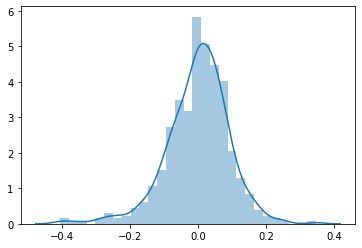

In [72]:
res = y_train - y_train_pred
sns.distplot(res);

# Step-4 Predictions and Evaluations on the Test set

In [73]:
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
# Create a list of numeric variables
numvars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bikes_test[numvars] = scaler.transform(bikes_test[numvars])
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
bikes_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,weather_2,weather_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [76]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [77]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

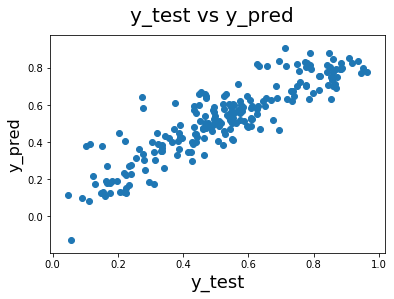

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [83]:
# Evaluate
r2_score(y_true = y_test, y_pred = y_pred)

0.7910951880182203

### So according to the final observations, we can deduce the final model as:

`cnt = 0.1260 + 0.2329 * yr + 0.5210 * temp - 0.1515 * windspeed + 0.1029 * summer + 0.1361 * winter + 0.0557 * August + 0.1134 * September - 0.0795 * weather_2 - 0.2776 * weather_3`

### Let's plot the correlation heatmap

In [89]:
final_model = pd.concat([X_test_new, y_test], axis =1)
final_model.head()

,const,yr,temp,windspeed,summer,winter,August,September,weather_2,weather_3,cnt
184,1.0,0,0.831783,0.084219,0,0,0,0,1,0,0.692706
535,1.0,1,0.901354,0.153728,1,0,0,0,0,0,0.712034
299,1.0,0,0.511964,0.334206,0,1,0,0,1,0,0.303382
221,1.0,0,0.881625,0.339570,0,0,1,0,0,0,0.547400
152,1.0,0,0.817246,0.537414,1,0,0,0,0,0,0.569029


In [91]:
final_model.describe()

,const,yr,temp,windspeed,summer,winter,August,September,weather_2,weather_3,cnt
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.481818,0.558718,0.313293,0.263636,0.236364,0.059091,0.086364,0.318182,0.027273,0.522154
std,0.0,0.500809,0.233187,0.159584,0.441609,0.425817,0.236333,0.281541,0.466833,0.163248,0.219163
min,1.0,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048205
25%,1.0,0.000000,0.355429,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.378595
50%,1.0,0.000000,0.558172,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524678
75%,1.0,1.000000,0.755981,0.402718,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.677750
max,1.0,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.963300


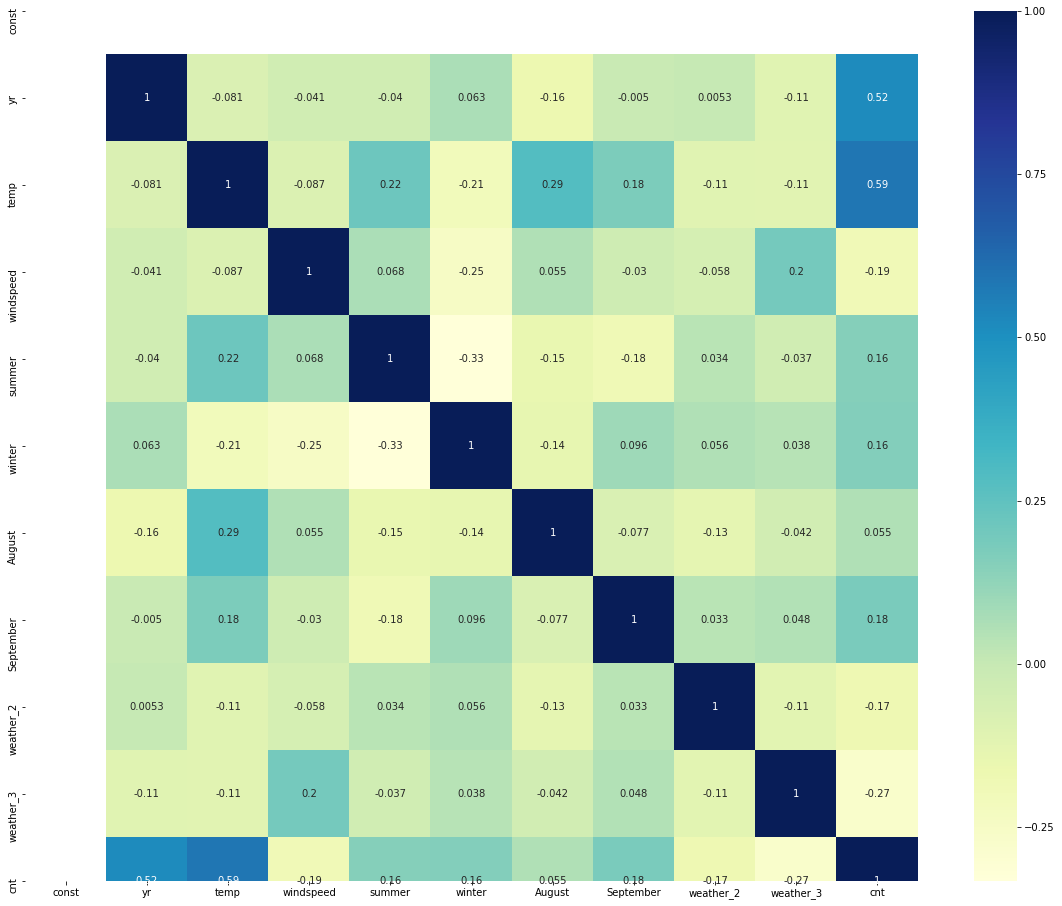

In [90]:

plt.figure(figsize = (20, 16))
sns.heatmap(final_model.corr(), annot= True, cmap="YlGnBu")
plt.show()

#### So looking at above heatmap, we can infer following points:
1. `cnt` is highly dependent on `temp`
- Total count of bikes rented increases with the increase in temperature
2. `cnt` is highly correlated with `yr`
- The number of bikes rented in 2019 has increased from that in 2018. This means that BoomBikes customer base has increased in the past year.
3. Negative correlation of `weather_2`, `weather_3` and `windspeed`:
- When the weather conditions are misty, cloudy, snowy, or rainy the bike rental count decreases. Same happens when the windspeed is high. 